In [1]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import numpy as np
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [2]:
import seaborn as sns
import pandas as pd

In [3]:
import math

In [4]:
train = pd.read_csv("./Data/train_df_errno.csv")
test = pd.read_csv("./Data/test_df.csv")
sub = pd.read_csv("./Data/sample_submission.csv")
age = pd.read_csv("./Data/age_gender_info.csv")
train.shape, test.shape, sub.shape, age.shape

((2896, 23), (1008, 21), (150, 2), (16, 23))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2896 entries, 0 to 2895
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        2896 non-null   object 
 1   총세대수        2896 non-null   int64  
 2   임대건물구분      2896 non-null   object 
 3   지역          2896 non-null   object 
 4   공급유형        2896 non-null   object 
 5   전용면적        2896 non-null   float64
 6   전용면적별세대수    2896 non-null   int64  
 7   공가수         2896 non-null   float64
 8   자격유형        2896 non-null   object 
 9   임대보증금       2327 non-null   object 
 10  임대료         2327 non-null   object 
 11  10분내지하철수    2685 non-null   float64
 12  10분내버스정류장수  2896 non-null   float64
 13  단지내주차면수     2896 non-null   float64
 14  단지코드_Type   2896 non-null   float64
 15  임대건물구분_lbl  2896 non-null   int64  
 16  지역_lbl      2896 non-null   int64  
 17  공급유형_lbl    2896 non-null   int64  
 18  자격유형_lbl    2896 non-null   int64  
 19  단지코드_lbl    2896 non-null  

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        1008 non-null   object 
 1   총세대수        1008 non-null   int64  
 2   임대건물구분      1008 non-null   object 
 3   지역          1008 non-null   object 
 4   공급유형        1008 non-null   object 
 5   전용면적        1008 non-null   float64
 6   전용면적별세대수    1008 non-null   int64  
 7   공가수         1008 non-null   float64
 8   자격유형        1008 non-null   object 
 9   임대보증금       828 non-null    object 
 10  임대료         828 non-null    object 
 11  10분내지하철수    970 non-null    float64
 12  10분내버스정류장수  1008 non-null   float64
 13  단지내주차면수     1008 non-null   float64
 14  단지코드_Type   1008 non-null   float64
 15  임대건물구분_lbl  1008 non-null   int64  
 16  지역_lbl      1008 non-null   int64  
 17  공급유형_lbl    1008 non-null   int64  
 18  자격유형_lbl    1008 non-null   int64  
 19  단지코드_lbl    1008 non-null  

In [7]:
train.columns, test.columns

(Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
        '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수',
        '단지코드_Type', '임대건물구분_lbl', '지역_lbl', '공급유형_lbl', '자격유형_lbl', '단지코드_lbl',
        'qcut_총세대수', '등록차량수', 'log_등록차량수'],
       dtype='object'),
 Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
        '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수',
        '단지코드_Type', '임대건물구분_lbl', '지역_lbl', '공급유형_lbl', '자격유형_lbl', '단지코드_lbl',
        'qcut_총세대수'],
       dtype='object'))

In [8]:
train.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금         569
임대료           569
10분내지하철수      211
10분내버스정류장수      0
단지내주차면수         0
단지코드_Type       0
임대건물구분_lbl      0
지역_lbl          0
공급유형_lbl        0
자격유형_lbl        0
단지코드_lbl        0
qcut_총세대수       0
등록차량수           0
log_등록차량수       0
dtype: int64

In [9]:
test.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금         180
임대료           180
10분내지하철수       38
10분내버스정류장수      0
단지내주차면수         0
단지코드_Type       0
임대건물구분_lbl      0
지역_lbl          0
공급유형_lbl        0
자격유형_lbl        0
단지코드_lbl        0
qcut_총세대수       0
dtype: int64

In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
총세대수,2896.0,891.025207,516.665211,26.000000,514.000000,780.000000,1106.000000,2568.000000
전용면적,2896.0,44.559033,32.000640,12.620000,32.100000,39.905000,51.292500,583.400000
전용면적별세대수,2896.0,102.822514,132.988590,1.000000,14.750000,60.000000,143.250000,1865.000000
공가수,2896.0,12.877417,10.653686,0.000000,4.000000,11.000000,20.000000,55.000000
10분내지하철수,2685.0,0.180261,0.431074,0.000000,0.000000,0.000000,0.000000,3.000000
10분내버스정류장수,2896.0,3.703706,2.665053,0.000000,2.000000,3.000000,4.000000,20.000000
단지내주차면수,2896.0,598.766575,396.677644,13.000000,277.000000,507.000000,823.000000,1798.000000
단지코드_Type,2896.0,2.871892,0.471455,1.000000,3.000000,3.000000,3.000000,3.000000
임대건물구분_lbl,2896.0,1.194061,0.395544,1.000000,1.000000,1.000000,1.000000,2.000000
지역_lbl,2896.0,6.072169,4.207811,1.000000,3.000000,5.000000,9.000000,16.000000


In [11]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
총세대수,1008.0,869.378968,535.908018,75.00,492.50,754.00,1161.00,2572.0
전용면적,1008.0,43.788462,36.105647,9.96,33.15,39.72,47.41,583.4
전용면적별세대수,1008.0,101.093254,126.674450,1.00,14.00,60.00,140.00,1341.0
공가수,1008.0,15.630952,11.116013,0.00,6.00,16.00,23.00,45.0
10분내지하철수,970.0,0.138144,0.437519,0.00,0.00,0.00,0.00,2.0
10분내버스정류장수,1008.0,4.597222,5.391566,1.00,2.00,3.00,5.00,50.0
단지내주차면수,1008.0,546.678571,341.278739,29.00,286.00,458.00,706.50,1696.0
단지코드_Type,1008.0,2.704365,0.707388,1.00,3.00,3.00,3.00,3.0
임대건물구분_lbl,1008.0,1.175595,0.380664,1.00,1.00,1.00,1.00,2.0
지역_lbl,1008.0,6.375000,4.082594,1.00,3.00,5.00,10.00,16.0


In [12]:
train.head(10)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수,등록차량수,log_등록차량수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,...,624.0,3.0,1,1,1,1,492,1,205.0,5.327876
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,...,624.0,3.0,1,1,1,1,492,1,205.0,5.327876
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,...,624.0,3.0,1,1,1,1,492,1,205.0,5.327876
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,...,624.0,3.0,1,1,1,1,492,1,205.0,5.327876
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,...,624.0,3.0,1,1,1,1,492,1,205.0,5.327876
5,C2515,545,아파트,경상남도,국민임대,51.97,106,17.0,A,23042000,...,624.0,3.0,1,1,1,1,492,1,205.0,5.327876
6,C2515,545,아파트,경상남도,국민임대,51.97,26,17.0,A,23042000,...,624.0,3.0,1,1,1,1,492,1,205.0,5.327876
7,C1407,1216,아파트,대전광역시,국민임대,30.95,288,13.0,A,15620000,...,1285.0,3.0,1,2,1,1,131,3,1064.0,6.970730
8,C1407,1216,아파트,대전광역시,국민임대,30.99,68,13.0,A,15620000,...,1285.0,3.0,1,2,1,1,131,3,1064.0,6.970730
9,C1407,1216,아파트,대전광역시,국민임대,30.99,34,13.0,A,15620000,...,1285.0,3.0,1,2,1,1,131,3,1064.0,6.970730


test set의 단지는 총 150개. 이중 50/100 개로 나뉘어 평가

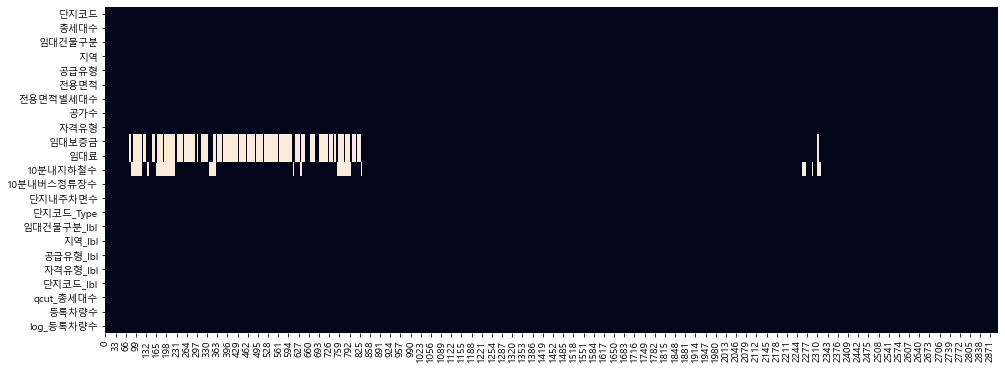

In [30]:
plt.figure(figsize=(16, 6))
sns.heatmap(train.isnull().T, cbar=False)
plt.show()

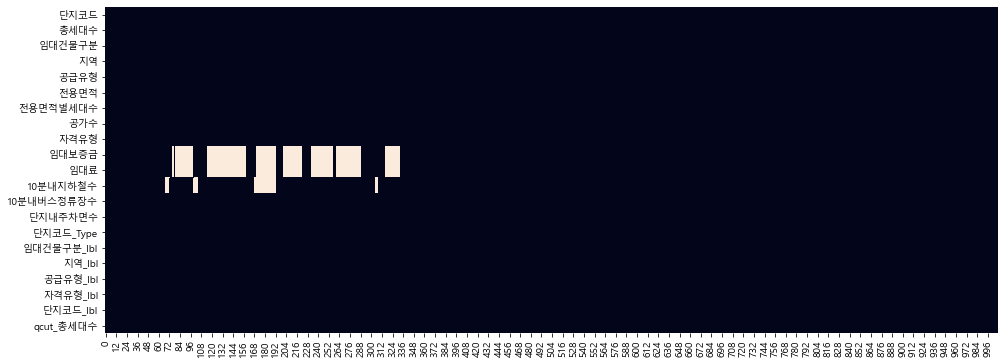

In [31]:
plt.figure(figsize=(16, 6))
sns.heatmap(test.isnull().T, cbar=False)
plt.show()

In [32]:
train.loc[train['10분내지하철수'].isnull()].sample(5)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수,등록차량수,log_등록차량수
2270,C2583,1106,아파트,대전광역시,영구임대,26.90,60,21.0,I,8707000,...,752.0,3.0,1,2,3,9,522,3,982.0,6.890609
612,C2216,390,아파트,충청남도,공공임대(50년),39.00,210,2.0,A,9401000,...,97.0,3.0,1,7,2,1,389,0,149.0,5.010635
779,C1875,1003,상가,충청남도,임대상가,18.98,1,5.0,D,NaN,...,192.0,3.0,2,7,4,4,279,3,209.0,5.347108
177,C1616,1507,상가,대전광역시,임대상가,37.49,1,1.0,D,NaN,...,407.0,3.0,2,2,4,4,182,4,98.0,4.595120
2263,C2583,1106,아파트,대전광역시,국민임대,36.85,24,21.0,A,11397000,...,752.0,3.0,1,2,1,1,522,3,982.0,6.890609


In [33]:
print('전체 단지 수:', train['단지코드'].nunique())
print('지하철 결측치 단지 수:', train.loc[train['10분내지하철수'].isnull()]['단지코드'].nunique())
print('지하철 결측치 단지:', train.loc[train['10분내지하철수'].isnull()]['단지코드'].unique())
print('지하철 결측치 단지 지역:', train.loc[train['10분내지하철수'].isnull()]['지역'].unique())

전체 단지 수: 414
지하철 결측치 단지 수: 20
지하철 결측치 단지: ['C1312' 'C1874' 'C1424' 'C2100' 'C2520' 'C1616' 'C1704' 'C2258' 'C1068'
 'C1983' 'C2216' 'C2644' 'C1005' 'C1004' 'C1875' 'C2156' 'C1175' 'C2583'
 'N2431' 'C1350']
지하철 결측치 단지 지역: ['충청남도' '대전광역시' '경상남도']


In [34]:
print('전체 단지 수:', test['단지코드'].nunique())
print('지하철 결측치 단지 수:', test.loc[test['10분내지하철수'].isnull()]['단지코드'].nunique())
print('지하철 결측치 단지:', test.loc[test['10분내지하철수'].isnull()]['단지코드'].unique())
print('지하철 결측치 단지 지역:', test.loc[test['10분내지하철수'].isnull()]['지역'].unique())

전체 단지 수: 147
지하철 결측치 단지 수: 4
지하철 결측치 단지: ['C1472' 'C1083' 'C2177' 'C1318']
지하철 결측치 단지 지역: ['충청남도' '대전광역시']


In [35]:
train[train['임대건물구분']=='아파트']['자격유형'].unique()

array(['A', 'B', 'C', 'E', 'F', 'G', 'H', 'I', 'D', 'J', 'K', 'L', 'M',
       'N', 'O'], dtype=object)

In [36]:
train[train['임대건물구분']=='상가']['자격유형'].unique()

array(['D'], dtype=object)

In [37]:
test[test['임대건물구분']=='아파트']['자격유형'].unique()

array(['H', 'A', 'E', 'C', 'D', 'G', 'I', 'J', 'K', 'L', 'M', 'N'],
      dtype=object)

In [38]:
test[test['임대건물구분']=='상가']['자격유형'].unique()

array(['D'], dtype=object)

In [39]:
train.loc[(train['임대건물구분']=='아파트')&(train['임대보증금'].isnull())]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수,등록차량수,log_등록차량수
2309,C1350,1401,아파트,대전광역시,공공분양,74.94,317,2.0,D,NaN,...,1636.0,3.0,1,2,8,4,117,4,2315.0,7.747597
2310,C1350,1401,아파트,대전광역시,공공분양,74.94,137,2.0,D,NaN,...,1636.0,3.0,1,2,8,4,117,4,2315.0,7.747597
2311,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,D,NaN,...,1636.0,3.0,1,2,8,4,117,4,2315.0,7.747597
2312,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,D,NaN,...,1636.0,3.0,1,2,8,4,117,4,2315.0,7.747597
2313,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,D,NaN,...,1636.0,3.0,1,2,8,4,117,4,2315.0,7.747597
2314,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,D,NaN,...,1636.0,3.0,1,2,8,4,117,4,2315.0,7.747597
2315,C1350,1401,아파트,대전광역시,공공분양,84.97,26,2.0,D,NaN,...,1636.0,3.0,1,2,8,4,117,4,2315.0,7.747597


In [40]:
train.loc[(train['임대건물구분']=='상가')&(train['임대보증금'].isnull())]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수,등록차량수,log_등록차량수
80,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,...,117.0,1.0,2,5,4,4,294,1,75.0,4.330733
81,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,...,117.0,1.0,2,5,4,4,294,1,75.0,4.330733
82,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,...,117.0,1.0,2,5,4,4,294,1,75.0,4.330733
83,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,...,117.0,1.0,2,5,4,4,294,1,75.0,4.330733
93,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,...,97.0,3.0,2,7,4,4,278,1,62.0,4.143135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,C2571,481,상가,경상남도,임대상가,31.84,1,5.0,D,NaN,...,65.0,3.0,2,1,4,4,518,1,62.0,4.143135
827,C2571,481,상가,경상남도,임대상가,31.84,1,5.0,D,NaN,...,65.0,3.0,2,1,4,4,518,1,62.0,4.143135
828,C2571,481,상가,경상남도,임대상가,31.84,1,5.0,D,NaN,...,65.0,3.0,2,1,4,4,518,1,62.0,4.143135
829,C2571,481,상가,경상남도,임대상가,31.84,1,5.0,D,NaN,...,65.0,3.0,2,1,4,4,518,1,62.0,4.143135


In [41]:
train.loc[(train['임대건물구분']=='아파트')&(train['임대료'].isnull())]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수,등록차량수,log_등록차량수
2309,C1350,1401,아파트,대전광역시,공공분양,74.94,317,2.0,D,NaN,...,1636.0,3.0,1,2,8,4,117,4,2315.0,7.747597
2310,C1350,1401,아파트,대전광역시,공공분양,74.94,137,2.0,D,NaN,...,1636.0,3.0,1,2,8,4,117,4,2315.0,7.747597
2311,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,D,NaN,...,1636.0,3.0,1,2,8,4,117,4,2315.0,7.747597
2312,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,D,NaN,...,1636.0,3.0,1,2,8,4,117,4,2315.0,7.747597
2313,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,D,NaN,...,1636.0,3.0,1,2,8,4,117,4,2315.0,7.747597
2314,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,D,NaN,...,1636.0,3.0,1,2,8,4,117,4,2315.0,7.747597
2315,C1350,1401,아파트,대전광역시,공공분양,84.97,26,2.0,D,NaN,...,1636.0,3.0,1,2,8,4,117,4,2315.0,7.747597


In [42]:
train.loc[(train['임대건물구분']=='상가')&(train['임대료'].isnull())]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수,등록차량수,log_등록차량수
80,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,...,117.0,1.0,2,5,4,4,294,1,75.0,4.330733
81,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,...,117.0,1.0,2,5,4,4,294,1,75.0,4.330733
82,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,...,117.0,1.0,2,5,4,4,294,1,75.0,4.330733
83,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,...,117.0,1.0,2,5,4,4,294,1,75.0,4.330733
93,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,...,97.0,3.0,2,7,4,4,278,1,62.0,4.143135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,C2571,481,상가,경상남도,임대상가,31.84,1,5.0,D,NaN,...,65.0,3.0,2,1,4,4,518,1,62.0,4.143135
827,C2571,481,상가,경상남도,임대상가,31.84,1,5.0,D,NaN,...,65.0,3.0,2,1,4,4,518,1,62.0,4.143135
828,C2571,481,상가,경상남도,임대상가,31.84,1,5.0,D,NaN,...,65.0,3.0,2,1,4,4,518,1,62.0,4.143135
829,C2571,481,상가,경상남도,임대상가,31.84,1,5.0,D,NaN,...,65.0,3.0,2,1,4,4,518,1,62.0,4.143135


In [43]:
test.loc[(test['임대건물구분']=='아파트')&(test['임대보증금'].isnull())]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
76,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,NaN,...,2.0,5.0,428.0,3.0,1,2,3,4,4,4
77,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,NaN,...,2.0,5.0,428.0,3.0,1,2,3,4,4,4
79,C1006,1505,아파트,대전광역시,영구임대,52.74,6,27.0,D,NaN,...,2.0,5.0,428.0,3.0,1,2,3,4,4,4


In [44]:
test.loc[(test['임대건물구분']=='상가')&(test['임대보증금'].isnull())]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
80,C1006,1505,상가,대전광역시,임대상가,38.00,1,27.0,D,NaN,...,2.0,5.0,428.0,3.0,2,2,4,4,4,4
81,C1006,1505,상가,대전광역시,임대상가,38.00,1,27.0,D,NaN,...,2.0,5.0,428.0,3.0,2,2,4,4,4,4
82,C1006,1505,상가,대전광역시,임대상가,37.26,1,27.0,D,NaN,...,2.0,5.0,428.0,3.0,2,2,4,4,4,4
83,C1006,1505,상가,대전광역시,임대상가,37.41,1,27.0,D,NaN,...,2.0,5.0,428.0,3.0,2,2,4,4,4,4
84,C1006,1505,상가,대전광역시,임대상가,37.41,1,27.0,D,NaN,...,2.0,5.0,428.0,3.0,2,2,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,C1729,627,상가,강원도,임대상가,32.46,1,0.0,D,NaN,...,0.0,5.0,131.0,3.0,2,5,4,4,228,1
329,C1729,627,상가,강원도,임대상가,34.86,1,0.0,D,NaN,...,0.0,5.0,131.0,3.0,2,5,4,4,228,1
330,C1729,627,상가,강원도,임대상가,35.76,1,0.0,D,NaN,...,0.0,5.0,131.0,3.0,2,5,4,4,228,1
331,C1729,627,상가,강원도,임대상가,50.08,1,0.0,D,NaN,...,0.0,5.0,131.0,3.0,2,5,4,4,228,1


In [45]:
test.loc[(test['임대건물구분']=='아파트')&(test['임대료'].isnull())]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
76,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,NaN,...,2.0,5.0,428.0,3.0,1,2,3,4,4,4
77,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,NaN,...,2.0,5.0,428.0,3.0,1,2,3,4,4,4
79,C1006,1505,아파트,대전광역시,영구임대,52.74,6,27.0,D,NaN,...,2.0,5.0,428.0,3.0,1,2,3,4,4,4


In [46]:
test.loc[(test['임대건물구분']=='상가')&(test['임대료'].isnull())]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
80,C1006,1505,상가,대전광역시,임대상가,38.00,1,27.0,D,NaN,...,2.0,5.0,428.0,3.0,2,2,4,4,4,4
81,C1006,1505,상가,대전광역시,임대상가,38.00,1,27.0,D,NaN,...,2.0,5.0,428.0,3.0,2,2,4,4,4,4
82,C1006,1505,상가,대전광역시,임대상가,37.26,1,27.0,D,NaN,...,2.0,5.0,428.0,3.0,2,2,4,4,4,4
83,C1006,1505,상가,대전광역시,임대상가,37.41,1,27.0,D,NaN,...,2.0,5.0,428.0,3.0,2,2,4,4,4,4
84,C1006,1505,상가,대전광역시,임대상가,37.41,1,27.0,D,NaN,...,2.0,5.0,428.0,3.0,2,2,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,C1729,627,상가,강원도,임대상가,32.46,1,0.0,D,NaN,...,0.0,5.0,131.0,3.0,2,5,4,4,228,1
329,C1729,627,상가,강원도,임대상가,34.86,1,0.0,D,NaN,...,0.0,5.0,131.0,3.0,2,5,4,4,228,1
330,C1729,627,상가,강원도,임대상가,35.76,1,0.0,D,NaN,...,0.0,5.0,131.0,3.0,2,5,4,4,228,1
331,C1729,627,상가,강원도,임대상가,50.08,1,0.0,D,NaN,...,0.0,5.0,131.0,3.0,2,5,4,4,228,1


In [47]:
train[(train['임대건물구분']=='아파트')&(train['임대보증금'].isnull())]['자격유형'].unique()

array(['D'], dtype=object)

In [48]:
train[(train['임대건물구분']=='상가')&(train['임대보증금'].isnull())]['자격유형'].unique()

array(['D'], dtype=object)

In [49]:
train[(train['임대건물구분']=='아파트')&(train['임대료'].isnull())]['자격유형'].unique()

array(['D'], dtype=object)

In [50]:
train[(train['임대건물구분']=='상가')&(train['임대료'].isnull())]['자격유형'].unique()

array(['D'], dtype=object)

In [51]:
test[(test['임대건물구분']=='아파트')&(test['임대보증금'].isnull())]['자격유형'].unique()

array(['D'], dtype=object)

In [52]:
test[(test['임대건물구분']=='상가')&(test['임대보증금'].isnull())]['자격유형'].unique()

array(['D'], dtype=object)

In [53]:
test[(test['임대건물구분']=='아파트')&(test['임대료'].isnull())]['자격유형'].unique()

array(['D'], dtype=object)

In [54]:
test[(test['임대건물구분']=='상가')&(test['임대료'].isnull())]['자격유형'].unique()

array(['D'], dtype=object)

In [55]:
print('전체 단지 수:', train['단지코드'].nunique())
print('상가 보유 단지 수:', train.loc[train['임대건물구분']=='상가']['단지코드'].nunique())
print('상가 보유 단지:', train.loc[train['임대건물구분']=='상가']['단지코드'].unique())
print('상가 보유 단지 지역:', train.loc[train['임대건물구분']=='상가']['지역'].unique())

전체 단지 수: 414
상가 보유 단지 수: 33
상가 보유 단지: ['C1925' 'C1874' 'C2416' 'C2621' 'C1616' 'C1704' 'C2258' 'C2038' 'C1859'
 'C1722' 'C2190' 'C1476' 'C1983' 'C2135' 'C2034' 'C1109' 'C2289' 'C2597'
 'C2310' 'C2132' 'C1439' 'C1899' 'C1056' 'C2644' 'C1206' 'C1775' 'C1790'
 'C2109' 'C1698' 'C1004' 'C1875' 'C2212' 'C2571']
상가 보유 단지 지역: ['강원도' '충청남도' '경상남도' '대전광역시' '부산광역시' '제주특별자치도']


(array([ 12.,   6.,  85., 180., 352., 314., 649., 781., 399., 118.]),
 array([2.56494936, 3.09283929, 3.62072921, 4.14861914, 4.67650907,
        5.204399  , 5.73228893, 6.26017885, 6.78806878, 7.31595871,
        7.84384864]),
 <BarContainer object of 10 artists>)

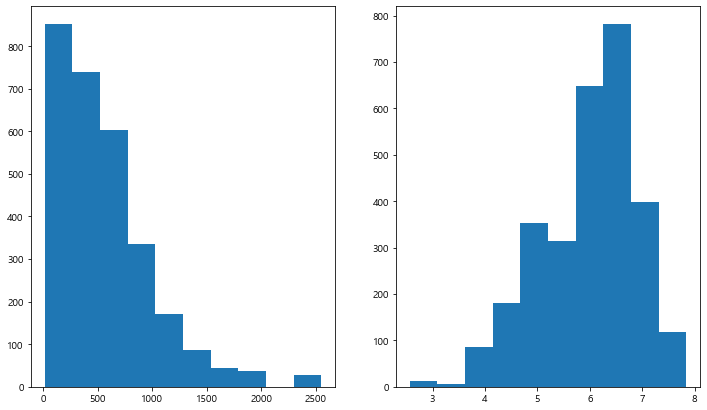

In [57]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,7))
ax1.hist(train['등록차량수'])
ax2.hist(np.log(train['등록차량수']))

In [65]:
all_df = pd.concat([train, test], join='inner', ignore_index=True)
all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,...,0.0,3.0,624.0,3.0,1,1,1,1,492,1
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,...,0.0,3.0,624.0,3.0,1,1,1,1,492,1
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,...,0.0,3.0,624.0,3.0,1,1,1,1,492,1
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,...,0.0,3.0,624.0,3.0,1,1,1,1,492,1
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,...,0.0,3.0,624.0,3.0,1,1,1,1,492,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,-,...,0.0,1.0,467.0,1.0,1,1,9,12,86,2
3900,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000,...,0.0,2.0,300.0,1.0,1,4,1,8,381,0
3901,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000,...,0.0,2.0,300.0,1.0,1,4,1,8,381,0
3902,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000,...,0.0,2.0,300.0,1.0,1,4,1,8,381,0


In [66]:
all_df.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금         749
임대료           749
10분내지하철수      249
10분내버스정류장수      0
단지내주차면수         0
단지코드_Type       0
임대건물구분_lbl      0
지역_lbl          0
공급유형_lbl        0
자격유형_lbl        0
단지코드_lbl        0
qcut_총세대수       0
dtype: int64

In [67]:
# all_df.loc[all_df['자격유형'].isnull()]

In [68]:
# all_df.loc[ 3092, "자격유형"] = 'A'
# all_df.loc[ 3154, "자격유형"] = 'C'

In [69]:
# mapping = { 'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 
#             'F':6, 'G':7, 'H':8, 'I':9, 'J':10, 
#             'K':11, 'L':12, 'M':13, 'N':14, 'O':15 }

# all_df['자격유형'] =all_df['자격유형'].map(mapping).astype(int)

In [70]:
# grouped = all_df.groupby(['임대건물구분', '지역'])
# group1 = grouped.get_group( ('아파트', '경상남도')  )
# group1

In [71]:
# grouped = all_df.groupby(['임대건물구분', '지역'])
# group1 = grouped.get_group( ('아파트', '경상남도')  )
# group1['10분내버스정류장수'].mean()

In [72]:
# val = group1['10분내버스정류장수'].mean()
# all_df.loc[all_df['10분내버스정류장수'].isnull(), "10분내버스정류장수"] = val
# all_df.loc[all_df['10분내버스정류장수'].isnull()]

In [73]:
# gubun1 = {'아파트':1, '상가':2}
# gubun2 = {'경상남도':1, '대전광역시':2, '경기도':3, '전라북도':4, 
#           '강원도':5, '광주광역시':6, '충청남도':7, '부산광역시':8, 
#           '제주특별자치도':9, '울산광역시':10, '충청북도':11, '전라남도':12, 
#           '경상북도':13, '대구광역시':14, '서울특별시':15, '세종특별자치시':16}
# gubun3 = {'국민임대':1, '공공임대(50년)':2, '영구임대':3, '임대상가':4, 
#           '공공임대(10년)':5, '공공임대(분납)':6, '장기전세':7, '공공분양':8, 
#           '행복주택':9, '공공임대(5년)':10}
# all_df['임대건물구분_lbl'] = all_df['임대건물구분'].map(gubun1)
# all_df['지역_lbl'] = all_df['지역'].map(gubun2)
# all_df['공급유형_lbl'] = all_df['공급유형'].map(gubun3)
# all_df

In [74]:
# all_df['단지코드'] = all_df['단지코드'].astype("category")
# all_df['단지코드_lbl'] = all_df['단지코드'].cat.codes
# all_df['qcut_총세대수'] = pd.qcut(all_df['총세대수'], 5, labels=False)
all_df['qcut_총세대수'].unique()

array([1, 3, 2, 4, 0], dtype=int64)

In [75]:
# group1 = ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', 
#           'C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 
#           'C1584', 'C2298', 'C2225', 'C1218', 'C1970', 'C1732', 'C2433', 'C1894', 'C1156', 'C2142', 
#           'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', 
#           'C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189' ]
# for one1 in group1:
#     all_df.loc[ all_df['단지코드'] == one1, "단지코드_Type" ] = 1

In [76]:
# group2 = ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804']
# for one2 in group2:
#     all_df.loc[all_df['단지코드'] == one2, '단지코드_Type'] = 2

In [77]:
# all_df['단지코드_Type'].unique()

In [78]:
# all_df.loc[all_df['단지코드_Type'].isna(), "단지코드_Type"] = 3
all_df['단지코드_Type'].unique()

array([3., 1., 2.])

In [79]:
# all_df_last = all_df.drop(['임대건물구분', '지역', '공급유형'] , axis=1)
# all_df_last

In [80]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        3904 non-null   object 
 1   총세대수        3904 non-null   int64  
 2   임대건물구분      3904 non-null   object 
 3   지역          3904 non-null   object 
 4   공급유형        3904 non-null   object 
 5   전용면적        3904 non-null   float64
 6   전용면적별세대수    3904 non-null   int64  
 7   공가수         3904 non-null   float64
 8   자격유형        3904 non-null   int32  
 9   임대보증금       3155 non-null   object 
 10  임대료         3155 non-null   object 
 11  10분내지하철수    3655 non-null   float64
 12  10분내버스정류장수  3904 non-null   float64
 13  단지내주차면수     3904 non-null   float64
 14  단지코드_Type   3904 non-null   float64
 15  임대건물구분_lbl  3904 non-null   int64  
 16  지역_lbl      3904 non-null   int64  
 17  공급유형_lbl    3904 non-null   int64  
 18  자격유형_lbl    3904 non-null   int64  
 19  단지코드_lbl    3904 non-null  

(array([3.266e+03, 4.760e+02, 1.060e+02, 4.500e+01, 4.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 1.8740e+02, 3.7380e+02, 5.6020e+02, 7.4660e+02,
        9.3300e+02, 1.1194e+03, 1.3058e+03, 1.4922e+03, 1.6786e+03,
        1.8650e+03]),
 <BarContainer object of 10 artists>)

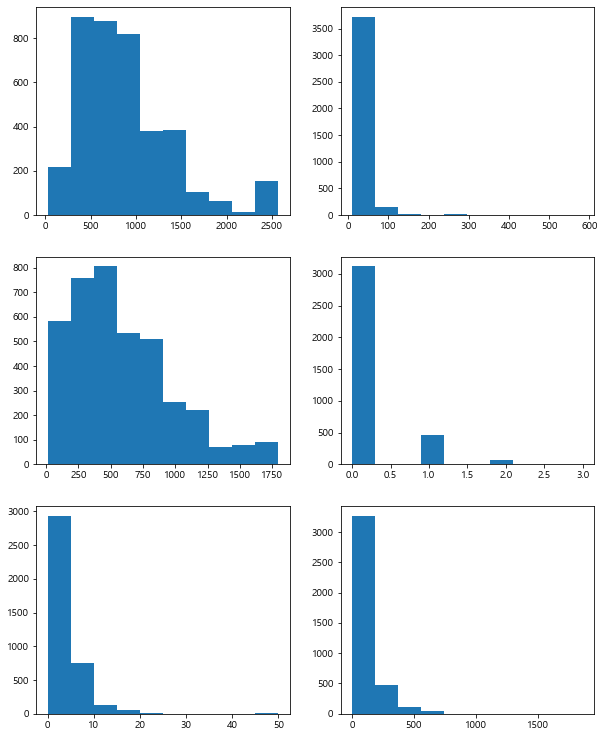

In [81]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,13))

ax[0][0].hist(all_df['총세대수'])
ax[0][1].hist(all_df['전용면적'])
ax[1][0].hist(all_df['단지내주차면수'])
ax[1][1].hist(all_df['10분내지하철수'])
ax[2][0].hist(all_df['10분내버스정류장수'])
ax[2][1].hist(all_df['전용면적별세대수'])

<AxesSubplot:>

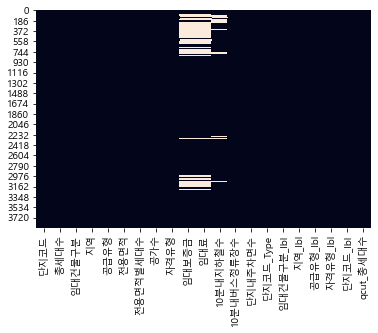

In [82]:
sns.heatmap(all_df.isnull(), cbar=False)

In [83]:
all_df[all_df['공급유형']=='국민임대']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000,...,0.0,3.0,624.0,3.0,1,1,1,1,492,1
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000,...,0.0,3.0,624.0,3.0,1,1,1,1,492,1
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000,...,0.0,3.0,624.0,3.0,1,1,1,1,492,1
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000,...,0.0,3.0,624.0,3.0,1,1,1,1,492,1
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000,...,0.0,3.0,624.0,3.0,1,1,1,1,492,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,C1267,675,아파트,경상남도,국민임대,46.72,112,38.0,8,24420000,...,0.0,1.0,467.0,1.0,1,1,1,8,86,2
3900,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,8,6872000,...,0.0,2.0,300.0,1.0,1,4,1,8,381,0
3901,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,8,6872000,...,0.0,2.0,300.0,1.0,1,4,1,8,381,0
3902,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,8,13410000,...,0.0,2.0,300.0,1.0,1,4,1,8,381,0


In [84]:
all_df[all_df['지역']=='경상남도']['10분내지하철수'].mean()

0.008888888888888889

#### 10분내지하철수 결측치

In [85]:
pd.set_option('display.max_rows', 800)  # 중간 생략 없이 800개 행을 다 보여준다.

In [86]:
all_df.loc[all_df['10분내지하철수'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
86,C1312,518,아파트,충청남도,국민임대,39.72,60,12.0,1,17460000,...,NaN,3.000000,527.0,1.0,1,7,1,1,101,1
87,C1312,518,아파트,충청남도,국민임대,39.98,89,12.0,1,17460000,...,NaN,3.000000,527.0,1.0,1,7,1,1,101,1
88,C1312,518,아파트,충청남도,국민임대,41.55,225,12.0,1,19954000,...,NaN,3.000000,527.0,1.0,1,7,1,1,101,1
89,C1312,518,아파트,충청남도,국민임대,46.90,143,12.0,1,28687000,...,NaN,3.000000,527.0,1.0,1,7,1,1,101,1
90,C1874,619,아파트,충청남도,영구임대,26.37,294,2.0,3,3141000,...,NaN,2.000000,97.0,3.0,1,7,3,3,278,1
91,C1874,619,아파트,충청남도,영구임대,26.37,149,2.0,3,3141000,...,NaN,2.000000,97.0,3.0,1,7,3,3,278,1
92,C1874,619,아파트,충청남도,영구임대,31.32,149,2.0,3,3731000,...,NaN,2.000000,97.0,3.0,1,7,3,3,278,1
93,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,4,NaN,...,NaN,2.000000,97.0,3.0,2,7,4,4,278,1
94,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,4,NaN,...,NaN,2.000000,97.0,3.0,2,7,4,4,278,1
95,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,4,NaN,...,NaN,2.000000,97.0,3.0,2,7,4,4,278,1


In [87]:
all_df['10분내지하철수'].unique()

array([ 0.,  1., nan,  2.,  3.])

In [88]:
all_df[all_df['10분내지하철수'].isnull()]['지역'].unique()

array(['충청남도', '대전광역시', '경상남도'], dtype=object)

In [89]:
all_df['임대건물구분'].unique()

array(['아파트', '상가'], dtype=object)

In [90]:
all_df[all_df['10분내지하철수'].isnull()]['공급유형'].unique()

array(['국민임대', '영구임대', '임대상가', '공공임대(50년)', '공공임대(10년)', '공공분양',
       '공공임대(분납)'], dtype=object)

In [91]:
grouped = all_df.groupby(all_df.loc[all_df['10분내지하철수'].isnull()]['지역'])
group1 = grouped.get_group('충청남도')
group2 = grouped.get_group('대전광역시')
group3 = grouped.get_group('경상남도')
group1  # 충청남도

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
86,C1312,518,아파트,충청남도,국민임대,39.72,60,12.0,1,17460000,...,NaN,3.0,527.0,1.0,1,7,1,1,101,1
87,C1312,518,아파트,충청남도,국민임대,39.98,89,12.0,1,17460000,...,NaN,3.0,527.0,1.0,1,7,1,1,101,1
88,C1312,518,아파트,충청남도,국민임대,41.55,225,12.0,1,19954000,...,NaN,3.0,527.0,1.0,1,7,1,1,101,1
89,C1312,518,아파트,충청남도,국민임대,46.90,143,12.0,1,28687000,...,NaN,3.0,527.0,1.0,1,7,1,1,101,1
90,C1874,619,아파트,충청남도,영구임대,26.37,294,2.0,3,3141000,...,NaN,2.0,97.0,3.0,1,7,3,3,278,1
91,C1874,619,아파트,충청남도,영구임대,26.37,149,2.0,3,3141000,...,NaN,2.0,97.0,3.0,1,7,3,3,278,1
92,C1874,619,아파트,충청남도,영구임대,31.32,149,2.0,3,3731000,...,NaN,2.0,97.0,3.0,1,7,3,3,278,1
93,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,4,NaN,...,NaN,2.0,97.0,3.0,2,7,4,4,278,1
94,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,4,NaN,...,NaN,2.0,97.0,3.0,2,7,4,4,278,1
95,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,4,NaN,...,NaN,2.0,97.0,3.0,2,7,4,4,278,1


In [92]:
group1['공급유형'].unique()  # 10분내지하철수 값이 NaN인 충청남도 지역 임대건물 단지의 공급유형

array(['국민임대', '영구임대', '임대상가', '공공임대(50년)'], dtype=object)

In [93]:
grouped = group1.groupby(group1['공급유형'])
group11 = grouped.get_group('국민임대')
group12 = grouped.get_group('영구임대')
group13 = grouped.get_group('임대상가')
group14 = grouped.get_group('공공임대(50년)')

In [94]:
all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='국민임대']['단지코드'].unique() # group11 (충청남도,국민임대)

<ipython-input-94-514b27af68fb>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='국민임대']['단지코드'].unique() # group11 (충청남도,국민임대)


array(['C1312', 'C1068', 'C1005', 'C2156', 'C1175', 'C1173', 'C1537',
       'C1929', 'C2394', 'C1316', 'C2255', 'C2237', 'C2539', 'C1472',
       'C2369'], dtype=object)

In [95]:
codes11 = ['C1312', 'C1068', 'C1005', 'C2156', 'C1175', 'C1173', 'C1537', 'C1929', 'C2394', 'C1316', 
           'C2255', 'C2237', 'C2539', 'C1472', 'C2369']  # 결측치, 미결측치 다 포함된 단지코드

for code in codes11:
    print(code, all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='국민임대'][all_df['단지코드']==code]['10분내지하철수'].mean())

<ipython-input-95-3615ff1ce6a9>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(code, all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='국민임대'][all_df['단지코드']==code]['10분내지하철수'].mean())


C1312 nan
C1068 nan
C1005 nan
C2156 nan
C1175 nan
C1173 0.0
C1537 0.0
C1929 0.0
C2394 0.0
C1316 0.0
C2255 0.0
C2237 0.0
C2539 0.0
C1472 nan
C2369 0.0


In [96]:
group11['10분내지하철수'] = all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='국민임대']['10분내지하철수'].mean()
group11

<ipython-input-96-1d16c9075fda>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group11['10분내지하철수'] = all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='국민임대']['10분내지하철수'].mean()
<ipython-input-96-1d16c9075fda>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group11['10분내지하철수'] = all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='국민임대']['10분내지하철수'].mean()


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
86,C1312,518,아파트,충청남도,국민임대,39.72,60,12.0,1,17460000,...,0.0,3.0,527.0,1.0,1,7,1,1,101,1
87,C1312,518,아파트,충청남도,국민임대,39.98,89,12.0,1,17460000,...,0.0,3.0,527.0,1.0,1,7,1,1,101,1
88,C1312,518,아파트,충청남도,국민임대,41.55,225,12.0,1,19954000,...,0.0,3.0,527.0,1.0,1,7,1,1,101,1
89,C1312,518,아파트,충청남도,국민임대,46.90,143,12.0,1,28687000,...,0.0,3.0,527.0,1.0,1,7,1,1,101,1
339,C1068,806,아파트,충청남도,국민임대,36.65,200,11.0,1,11234000,...,0.0,2.0,804.0,1.0,1,7,1,1,30,2
340,C1068,806,아파트,충청남도,국민임대,36.98,130,11.0,1,11234000,...,0.0,2.0,804.0,1.0,1,7,1,1,30,2
341,C1068,806,아파트,충청남도,국민임대,41.55,252,11.0,1,14981000,...,0.0,2.0,804.0,1.0,1,7,1,1,30,2
342,C1068,806,아파트,충청남도,국민임대,46.86,44,11.0,1,18726000,...,0.0,2.0,804.0,1.0,1,7,1,1,30,2
343,C1068,806,아파트,충청남도,국민임대,46.98,88,11.0,1,18726000,...,0.0,2.0,804.0,1.0,1,7,1,1,30,2
344,C1068,806,아파트,충청남도,국민임대,51.93,91,11.0,1,24343000,...,0.0,2.0,804.0,1.0,1,7,1,1,30,2


In [97]:
all_df.loc[all_df['지역']=='충청남도'][all_df['공급유형']=='영구임대']['단지코드'].unique() # group12(충청남도,영구임대)

<ipython-input-97-7bff531c7287>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df.loc[all_df['지역']=='충청남도'][all_df['공급유형']=='영구임대']['단지코드'].unique() # group12(충청남도,영구임대)


array(['C1874', 'C1983', 'C2644', 'C1004', 'C1875', 'C2255', 'C2539',
       'C2177'], dtype=object)

In [98]:
codes12 = ['C1874', 'C1983', 'C2644', 'C1004', 'C1875', 'C2255', 'C2539', 'C2177']

for code in codes12:
    print(code, all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='영구임대'][all_df['단지코드']==code]['10분내지하철수'].mean())

<ipython-input-98-10902c408636>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(code, all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='영구임대'][all_df['단지코드']==code]['10분내지하철수'].mean())


C1874 nan
C1983 nan
C2644 nan
C1004 nan
C1875 nan
C2255 0.0
C2539 0.0
C2177 nan


In [99]:
group12['10분내지하철수'] = all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='영구임대']['10분내지하철수'].mean()
group12

<ipython-input-99-fb560108653b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group12['10분내지하철수'] = all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='영구임대']['10분내지하철수'].mean()
<ipython-input-99-fb560108653b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group12['10분내지하철수'] = all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='영구임대']['10분내지하철수'].mean()


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
90,C1874,619,아파트,충청남도,영구임대,26.37,294,2.0,3,3141000,...,0.0,2.0,97.0,3.0,1,7,3,3,278,1
91,C1874,619,아파트,충청남도,영구임대,26.37,149,2.0,3,3141000,...,0.0,2.0,97.0,3.0,1,7,3,3,278,1
92,C1874,619,아파트,충청남도,영구임대,31.32,149,2.0,3,3731000,...,0.0,2.0,97.0,3.0,1,7,3,3,278,1
348,C1983,903,아파트,충청남도,영구임대,26.37,478,3.0,3,8083000,...,0.0,4.0,200.0,3.0,1,7,3,3,310,3
349,C1983,903,아파트,충청남도,영구임대,31.32,99,3.0,3,9670000,...,0.0,4.0,200.0,3.0,1,7,3,3,310,3
634,C2644,779,아파트,충청남도,영구임대,26.37,239,7.0,3,8684000,...,0.0,12.0,190.0,1.0,1,7,3,3,542,2
635,C2644,779,아파트,충청남도,영구임대,26.37,149,7.0,3,8684000,...,0.0,12.0,190.0,1.0,1,7,3,3,542,2
756,C1004,521,아파트,충청남도,영구임대,39.30,240,3.0,3,4682000,...,0.0,2.0,153.0,3.0,1,7,3,3,2,1
757,C1004,521,아파트,충청남도,영구임대,39.69,264,3.0,3,4728000,...,0.0,2.0,153.0,3.0,1,7,3,3,2,1
775,C1875,1003,아파트,충청남도,영구임대,26.37,596,5.0,3,3141000,...,0.0,8.0,192.0,3.0,1,7,3,3,279,3


In [100]:
all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='임대상가']['단지코드'].unique()  # group13(충청남도,임대상가)

<ipython-input-100-0b90405ea644>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='임대상가']['단지코드'].unique()  # group13(충청남도,임대상가)


array(['C1874', 'C1983', 'C2644', 'C1004', 'C1875', 'C2177'], dtype=object)

In [101]:
codes13 = ['C1874', 'C1983', 'C2644', 'C1004', 'C1875', 'C2177']

for code in codes13:
    print(code, all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='임대상가'][all_df['단지코드']==code]['10분내지하철수'].mean())

<ipython-input-101-5efd7df6d7ed>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(code, all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='임대상가'][all_df['단지코드']==code]['10분내지하철수'].mean())


C1874 nan
C1983 nan
C2644 nan
C1004 nan
C1875 nan
C2177 nan


In [102]:
group13['10분내지하철수'] = all_df[all_df['지역']=='충청남도']['10분내지하철수'].mean()
group13  # 단지 코드 평균이 NaN이므로 충남 지역 10분내지하철수의 평균으로 채움

<ipython-input-102-5147d4e24cd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group13['10분내지하철수'] = all_df[all_df['지역']=='충청남도']['10분내지하철수'].mean()


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
93,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,4,NaN,...,0.0,2.0,97.0,3.0,2,7,4,4,278,1
94,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,4,NaN,...,0.0,2.0,97.0,3.0,2,7,4,4,278,1
95,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,4,NaN,...,0.0,2.0,97.0,3.0,2,7,4,4,278,1
96,C1874,619,상가,충청남도,임대상가,22.89,1,2.0,4,NaN,...,0.0,2.0,97.0,3.0,2,7,4,4,278,1
97,C1874,619,상가,충청남도,임대상가,23.13,1,2.0,4,NaN,...,0.0,2.0,97.0,3.0,2,7,4,4,278,1
98,C1874,619,상가,충청남도,임대상가,23.13,1,2.0,4,NaN,...,0.0,2.0,97.0,3.0,2,7,4,4,278,1
99,C1874,619,상가,충청남도,임대상가,23.25,1,2.0,4,NaN,...,0.0,2.0,97.0,3.0,2,7,4,4,278,1
100,C1874,619,상가,충청남도,임대상가,27.75,1,2.0,4,NaN,...,0.0,2.0,97.0,3.0,2,7,4,4,278,1
101,C1874,619,상가,충청남도,임대상가,27.75,1,2.0,4,NaN,...,0.0,2.0,97.0,3.0,2,7,4,4,278,1
102,C1874,619,상가,충청남도,임대상가,27.75,1,2.0,4,NaN,...,0.0,2.0,97.0,3.0,2,7,4,4,278,1


In [103]:
all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='공공임대(50년)']['단지코드'].unique()  # group14(충청남도,공공임대(50년))

<ipython-input-103-571abfa5abcd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='공공임대(50년)']['단지코드'].unique()  # group14(충청남도,공공임대(50년))


array(['C1983', 'C2216', 'C2644', 'C1318'], dtype=object)

In [104]:
codes14 = ['C1983', 'C2216', 'C2644', 'C1318']

for code in codes14:
    print(code, all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='공공임대(50년)'][all_df['단지코드']==code]['10분내지하철수'].mean())

C1983 nan
C2216 nan
C2644 nan
C1318 nan


<ipython-input-104-ea1baa07ca27>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(code, all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='공공임대(50년)'][all_df['단지코드']==code]['10분내지하철수'].mean())


In [105]:
all_df[all_df['지역']=='충청남도']['10분내지하철수'].mean()

0.0

In [106]:
group14['10분내지하철수'] = all_df[all_df['지역']=='충청남도']['10분내지하철수'].mean() 
group14  # 단지 코드 평균이 NaN이므로 충남 지역 10분내지하철수의 평균으로 채움

<ipython-input-106-fe4c510d45b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group14['10분내지하철수'] = all_df[all_df['지역']=='충청남도']['10분내지하철수'].mean()


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
345,C1983,903,아파트,충청남도,공공임대(50년),36.00,40,3.0,1,10363000,...,0.0,4.0,200.0,3.0,1,7,2,1,310,3
346,C1983,903,아파트,충청남도,공공임대(50년),35.28,198,3.0,1,10060000,...,0.0,4.0,200.0,3.0,1,7,2,1,310,3
347,C1983,903,아파트,충청남도,공공임대(50년),35.28,78,3.0,1,10060000,...,0.0,4.0,200.0,3.0,1,7,2,1,310,3
612,C2216,390,아파트,충청남도,공공임대(50년),39.00,210,2.0,1,9401000,...,0.0,1.0,97.0,3.0,1,7,2,1,389,0
613,C2216,390,아파트,충청남도,공공임대(50년),39.39,180,2.0,1,9493000,...,0.0,1.0,97.0,3.0,1,7,2,1,389,0
632,C2644,779,아파트,충청남도,공공임대(50년),37.67,89,7.0,1,11879000,...,0.0,12.0,190.0,1.0,1,7,2,1,542,2
633,C2644,779,아파트,충청남도,공공임대(50년),37.67,298,7.0,1,11879000,...,0.0,12.0,190.0,1.0,1,7,2,1,542,2
3201,C1318,312,아파트,충청남도,공공임대(50년),39.51,135,1.0,1,14440000,...,0.0,11.0,226.0,3.0,1,7,2,1,103,0
3202,C1318,312,아파트,충청남도,공공임대(50년),39.72,18,1.0,1,14515000,...,0.0,11.0,226.0,3.0,1,7,2,1,103,0
3203,C1318,312,아파트,충청남도,공공임대(50년),49.99,159,1.0,1,18269000,...,0.0,11.0,226.0,3.0,1,7,2,1,103,0


In [107]:
group11_mean = group11['10분내지하철수'].mean()
group12_mean = group12['10분내지하철수'].mean()
group13_mean = group13['10분내지하철수'].mean()
group14_mean = group14['10분내지하철수'].mean()
all_df.loc[(all_df['지역']=='충청남도')&(all_df['공급유형']=='국민임대')&(all_df['10분내지하철수'].isnull()), '10분내지하철수']=group11_mean
all_df.loc[(all_df['지역']=='충청남도')&(all_df['공급유형']=='영구임대')&(all_df['10분내지하철수'].isnull()), '10분내지하철수']=group12_mean
all_df.loc[(all_df['지역']=='충청남도')&(all_df['공급유형']=='임대상가')&(all_df['10분내지하철수'].isnull()), '10분내지하철수']=group13_mean
all_df.loc[(all_df['지역']=='충청남도')&(all_df['공급유형']=='공공임대(50년)')&(all_df['10분내지하철수'].isnull()), '10분내지하철수']=group14_mean

In [108]:

all_df.loc[all_df['10분내지하철수'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
136,C1424,625,아파트,대전광역시,공공임대(50년),39.99,268,2.0,1,14247000,...,NaN,7.000000,517.0,1.0,1,2,2,1,135,1
137,C1424,625,아파트,대전광역시,공공임대(50년),49.95,119,2.0,1,20173000,...,NaN,7.000000,517.0,1.0,1,2,2,1,135,1
138,C1424,625,아파트,대전광역시,공공임대(50년),49.95,237,2.0,1,21203000,...,NaN,7.000000,517.0,1.0,1,2,2,1,135,1
139,C2100,880,아파트,대전광역시,국민임대,51.51,46,4.0,1,22307000,...,NaN,5.000000,736.0,3.0,1,2,1,1,352,2
140,C2100,880,아파트,대전광역시,국민임대,51.59,35,4.0,1,22307000,...,NaN,5.000000,736.0,3.0,1,2,1,1,352,2
141,C2100,880,아파트,대전광역시,국민임대,51.90,589,4.0,1,22307000,...,NaN,5.000000,736.0,3.0,1,2,1,1,352,2
142,C2100,880,아파트,대전광역시,국민임대,59.91,118,4.0,1,27885000,...,NaN,5.000000,736.0,3.0,1,2,1,1,352,2
143,C2100,880,아파트,대전광역시,국민임대,59.94,46,4.0,1,27885000,...,NaN,5.000000,736.0,3.0,1,2,1,1,352,2
144,C2100,880,아파트,대전광역시,국민임대,59.99,46,4.0,1,27885000,...,NaN,5.000000,736.0,3.0,1,2,1,1,352,2
163,C2520,970,아파트,대전광역시,공공임대(50년),39.69,960,2.0,1,13155000,...,NaN,2.000000,420.0,1.0,1,2,2,1,494,3


In [109]:
group2  #대전광역시

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
136,C1424,625,아파트,대전광역시,공공임대(50년),39.99,268,2.0,1,14247000,...,NaN,7.0,517.0,1.0,1,2,2,1,135,1
137,C1424,625,아파트,대전광역시,공공임대(50년),49.95,119,2.0,1,20173000,...,NaN,7.0,517.0,1.0,1,2,2,1,135,1
138,C1424,625,아파트,대전광역시,공공임대(50년),49.95,237,2.0,1,21203000,...,NaN,7.0,517.0,1.0,1,2,2,1,135,1
139,C2100,880,아파트,대전광역시,국민임대,51.51,46,4.0,1,22307000,...,NaN,5.0,736.0,3.0,1,2,1,1,352,2
140,C2100,880,아파트,대전광역시,국민임대,51.59,35,4.0,1,22307000,...,NaN,5.0,736.0,3.0,1,2,1,1,352,2
141,C2100,880,아파트,대전광역시,국민임대,51.90,589,4.0,1,22307000,...,NaN,5.0,736.0,3.0,1,2,1,1,352,2
142,C2100,880,아파트,대전광역시,국민임대,59.91,118,4.0,1,27885000,...,NaN,5.0,736.0,3.0,1,2,1,1,352,2
143,C2100,880,아파트,대전광역시,국민임대,59.94,46,4.0,1,27885000,...,NaN,5.0,736.0,3.0,1,2,1,1,352,2
144,C2100,880,아파트,대전광역시,국민임대,59.99,46,4.0,1,27885000,...,NaN,5.0,736.0,3.0,1,2,1,1,352,2
163,C2520,970,아파트,대전광역시,공공임대(50년),39.69,960,2.0,1,13155000,...,NaN,2.0,420.0,1.0,1,2,2,1,494,3


In [110]:
group2['공급유형'].unique()  # 10분내지하철수 값이 NaN인 대전광역시 지역 단지의 공급유형

array(['공공임대(50년)', '국민임대', '영구임대', '임대상가', '공공분양', '공공임대(10년)',
       '공공임대(분납)'], dtype=object)

In [111]:
grouped = group2.groupby(group2['공급유형'])
group21 = grouped.get_group('공공임대(50년)')
group22 = grouped.get_group('국민임대')
group23 = grouped.get_group('영구임대')
group24 = grouped.get_group('임대상가')
group25 = grouped.get_group('공공분양')
group26 = grouped.get_group('공공임대(10년)')
group27 = grouped.get_group('공공임대(분납)')

In [112]:
all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(50년)']['단지코드'].unique()  # group21

<ipython-input-112-1e252cfe5b17>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(50년)']['단지코드'].unique()  # group21


array(['C1424', 'C2520'], dtype=object)

In [113]:
codes21 = ['C1424', 'C2520']  # 단지코드별 10분내지하철수의 평균이 NaN이므로 대전 지역 평균으로 채움

for code in codes21:
    print(code, all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(50년)'][all_df['단지코드']==code]['10분내지하철수'].mean(), end=' ')

C1424 nan C2520 nan 

<ipython-input-113-1f02c84b8b6b>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(code, all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(50년)'][all_df['단지코드']==code]['10분내지하철수'].mean(), end=' ')


In [114]:
all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(50년)']['10분내지하철수'].mean()

<ipython-input-114-d68b232e1505>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(50년)']['10분내지하철수'].mean()


nan

In [115]:
all_df[all_df['지역']=='대전광역시']['10분내지하철수'].mean()  # 해당 공급유형의 평균도 결측이 발생하였으므로 지역 평균으로 채움

0.8409090909090909

In [116]:
group21['10분내지하철수'] = math.trunc(all_df[all_df['지역']=='대전광역시']['10분내지하철수'].mean())
group21

<ipython-input-116-cdc2c1f93f55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group21['10분내지하철수'] = math.trunc(all_df[all_df['지역']=='대전광역시']['10분내지하철수'].mean())


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
136,C1424,625,아파트,대전광역시,공공임대(50년),39.99,268,2.0,1,14247000,...,0,7.0,517.0,1.0,1,2,2,1,135,1
137,C1424,625,아파트,대전광역시,공공임대(50년),49.95,119,2.0,1,20173000,...,0,7.0,517.0,1.0,1,2,2,1,135,1
138,C1424,625,아파트,대전광역시,공공임대(50년),49.95,237,2.0,1,21203000,...,0,7.0,517.0,1.0,1,2,2,1,135,1
163,C2520,970,아파트,대전광역시,공공임대(50년),39.69,960,2.0,1,13155000,...,0,2.0,420.0,1.0,1,2,2,1,494,3


In [117]:
all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='국민임대']['단지코드'].unique()  # group22

<ipython-input-117-4958b4b90807>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='국민임대']['단지코드'].unique()  # group22


array(['C1407', 'C1171', 'C2100', 'C2319', 'C1032', 'C1663', 'C2276',
       'C1155', 'C1693', 'C1177', 'C1406', 'C2314', 'C2583', 'C1017',
       'C1083', 'C1215', 'C1189'], dtype=object)

In [118]:
codes22 = ['C1407','C1171','C2100','C2319','C1032','C1663','C2276','C1155','C1693','C1177',
 'C1406','C2314','C2583','C1017','C1083','C1215','C1189']

for code in codes22:
    print(code, all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='국민임대'][all_df['단지코드']==code]['10분내지하철수'].mean())

<ipython-input-118-01a9d6570470>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(code, all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='국민임대'][all_df['단지코드']==code]['10분내지하철수'].mean())


C1407 1.0
C1171 0.0
C2100 nan
C2319 1.0
C1032 1.0
C1663 1.0
C2276 0.0
C1155 1.0
C1693 0.0
C1177 1.0
C1406 0.0
C2314 0.0
C2583 nan
C1017 0.0
C1083 nan
C1215 1.0
C1189 0.0


In [119]:
all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='국민임대']['10분내지하철수'].mean()

<ipython-input-119-964cef6cc114>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='국민임대']['10분내지하철수'].mean()


0.5102040816326531

In [120]:
group22['10분내지하철수'] = math.trunc(all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='국민임대']['10분내지하철수'].mean())
group22

<ipython-input-120-56d4b2332096>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group22['10분내지하철수'] = math.trunc(all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='국민임대']['10분내지하철수'].mean())
<ipython-input-120-56d4b2332096>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group22['10분내지하철수'] = math.trunc(all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='국민임대']['10분내지하철수'].mean())


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
139,C2100,880,아파트,대전광역시,국민임대,51.51,46,4.0,1,22307000,...,0,5.0,736.0,3.0,1,2,1,1,352,2
140,C2100,880,아파트,대전광역시,국민임대,51.59,35,4.0,1,22307000,...,0,5.0,736.0,3.0,1,2,1,1,352,2
141,C2100,880,아파트,대전광역시,국민임대,51.90,589,4.0,1,22307000,...,0,5.0,736.0,3.0,1,2,1,1,352,2
142,C2100,880,아파트,대전광역시,국민임대,59.91,118,4.0,1,27885000,...,0,5.0,736.0,3.0,1,2,1,1,352,2
143,C2100,880,아파트,대전광역시,국민임대,59.94,46,4.0,1,27885000,...,0,5.0,736.0,3.0,1,2,1,1,352,2
144,C2100,880,아파트,대전광역시,국민임대,59.99,46,4.0,1,27885000,...,0,5.0,736.0,3.0,1,2,1,1,352,2
2263,C2583,1106,아파트,대전광역시,국민임대,36.85,24,21.0,1,11397000,...,0,2.0,752.0,3.0,1,2,1,1,522,3
2264,C2583,1106,아파트,대전광역시,국민임대,36.85,70,21.0,1,11397000,...,0,2.0,752.0,3.0,1,2,1,1,522,3
2265,C2583,1106,아파트,대전광역시,국민임대,36.93,604,21.0,1,11397000,...,0,2.0,752.0,3.0,1,2,1,1,522,3
2266,C2583,1106,아파트,대전광역시,국민임대,36.93,24,21.0,1,11397000,...,0,2.0,752.0,3.0,1,2,1,1,522,3


In [121]:
all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='영구임대']['단지코드'].unique()  # group23

<ipython-input-121-5d6387d0c473>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='영구임대']['단지코드'].unique()  # group23


array(['C2621', 'C1616', 'C1704', 'C2258', 'C2038', 'C1859', 'C2314',
       'C2583', 'C1006'], dtype=object)

In [122]:
codes23 = ['C2621', 'C1616', 'C1704', 'C2258', 'C2038', 'C1859', 'C2314', 'C2583', 'C1006']

for code in codes23:
    print(code, all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='영구임대'][all_df['단지코드']==code]['10분내지하철수'].mean())

<ipython-input-122-8f1a2749d960>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(code, all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='영구임대'][all_df['단지코드']==code]['10분내지하철수'].mean())


C2621 1.0
C1616 nan
C1704 nan
C2258 nan
C2038 1.0
C1859 1.0
C2314 0.0
C2583 nan
C1006 2.0


In [123]:
all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='영구임대']['10분내지하철수'].mean()

<ipython-input-123-46f0cad82ca4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='영구임대']['10분내지하철수'].mean()


1.1538461538461537

In [124]:
group23['10분내지하철수'] = round(all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='영구임대']['10분내지하철수'].mean())
group23

<ipython-input-124-fa79255541a4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group23['10분내지하철수'] = round(all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='영구임대']['10분내지하철수'].mean())
<ipython-input-124-fa79255541a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group23['10분내지하철수'] = round(all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='영구임대']['10분내지하철수'].mean())


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
168,C1616,1507,아파트,대전광역시,영구임대,26.37,588,1.0,3,5787000,...,1,2.0,407.0,3.0,1,2,3,3,182,4
169,C1616,1507,아파트,대전광역시,영구임대,31.32,450,1.0,3,6873000,...,1,2.0,407.0,3.0,1,2,3,3,182,4
170,C1616,1507,아파트,대전광역시,영구임대,40.32,450,1.0,5,54040000,...,1,2.0,407.0,3.0,1,2,3,5,182,4
190,C1704,639,아파트,대전광역시,영구임대,39.30,204,34.0,3,8625000,...,1,7.0,162.0,3.0,1,2,3,3,219,1
191,C1704,639,아파트,대전광역시,영구임대,39.69,420,34.0,3,8710000,...,1,7.0,162.0,3.0,1,2,3,3,219,1
207,C2258,965,아파트,대전광역시,영구임대,26.37,588,13.0,3,5787000,...,1,3.0,287.0,3.0,1,2,3,3,402,3
208,C2258,965,아파트,대전광역시,영구임대,31.32,180,13.0,3,6873000,...,1,3.0,287.0,3.0,1,2,3,3,402,3
209,C2258,965,아파트,대전광역시,영구임대,40.32,180,13.0,3,8848000,...,1,3.0,287.0,3.0,1,2,3,3,402,3
2269,C2583,1106,아파트,대전광역시,영구임대,21.97,60,21.0,9,7175000,...,1,2.0,752.0,3.0,1,2,3,9,522,3
2270,C2583,1106,아파트,대전광역시,영구임대,26.90,60,21.0,9,8707000,...,1,2.0,752.0,3.0,1,2,3,9,522,3


In [125]:
all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='임대상가']['단지코드'].unique()  # group24

<ipython-input-125-6a3e213e4161>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='임대상가']['단지코드'].unique()  # group24


array(['C2621', 'C1616', 'C1704', 'C2258', 'C2038', 'C1859', 'C1006'],
      dtype=object)

In [126]:
codes24 = ['C2621', 'C1616', 'C1704', 'C2258', 'C2038', 'C1859', 'C1006']

for code in codes24:
    print(code, all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='임대상가'][all_df['단지코드']==code]['10분내지하철수'].mean())

C2621 1.0
C1616 nan
C1704 nan
C2258 nan
C2038 1.0
C1859 1.0
C1006 2.0


<ipython-input-126-9b9bdaab93b1>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(code, all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='임대상가'][all_df['단지코드']==code]['10분내지하철수'].mean())


In [127]:
all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='임대상가']['10분내지하철수'].mean()

<ipython-input-127-f2330e511ed8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='임대상가']['10분내지하철수'].mean()


1.2439024390243902

In [128]:
group24['10분내지하철수'] = round(all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='임대상가']['10분내지하철수'].mean())
group24

<ipython-input-128-ce4e2a8e07e9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group24['10분내지하철수'] = round(all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='임대상가']['10분내지하철수'].mean())
<ipython-input-128-ce4e2a8e07e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group24['10분내지하철수'] = round(all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='임대상가']['10분내지하철수'].mean())


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
171,C1616,1507,상가,대전광역시,임대상가,38.00,1,1.0,4,NaN,...,1,2.0,407.0,3.0,2,2,4,4,182,4
172,C1616,1507,상가,대전광역시,임대상가,38.00,1,1.0,4,NaN,...,1,2.0,407.0,3.0,2,2,4,4,182,4
173,C1616,1507,상가,대전광역시,임대상가,37.26,1,1.0,4,NaN,...,1,2.0,407.0,3.0,2,2,4,4,182,4
174,C1616,1507,상가,대전광역시,임대상가,37.41,1,1.0,4,NaN,...,1,2.0,407.0,3.0,2,2,4,4,182,4
175,C1616,1507,상가,대전광역시,임대상가,37.41,1,1.0,4,NaN,...,1,2.0,407.0,3.0,2,2,4,4,182,4
176,C1616,1507,상가,대전광역시,임대상가,37.41,1,1.0,4,NaN,...,1,2.0,407.0,3.0,2,2,4,4,182,4
177,C1616,1507,상가,대전광역시,임대상가,37.49,1,1.0,4,NaN,...,1,2.0,407.0,3.0,2,2,4,4,182,4
178,C1616,1507,상가,대전광역시,임대상가,37.95,1,1.0,4,NaN,...,1,2.0,407.0,3.0,2,2,4,4,182,4
179,C1616,1507,상가,대전광역시,임대상가,37.95,1,1.0,4,NaN,...,1,2.0,407.0,3.0,2,2,4,4,182,4
180,C1616,1507,상가,대전광역시,임대상가,38.04,1,1.0,4,NaN,...,1,2.0,407.0,3.0,2,2,4,4,182,4


In [129]:
all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공분양']['단지코드'].unique()  # group25

<ipython-input-129-ba5a3e703060>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공분양']['단지코드'].unique()  # group25


array(['C1350'], dtype=object)

In [130]:
print('C1350', all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공분양'][all_df['단지코드']=='C1350']['10분내지하철수'].mean())

C1350 nan


<ipython-input-130-84ae4bdf6f96>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('C1350', all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공분양'][all_df['단지코드']=='C1350']['10분내지하철수'].mean())


In [131]:
all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공분양']['10분내지하철수'].mean()

<ipython-input-131-6faf0a840035>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공분양']['10분내지하철수'].mean()


nan

In [132]:
all_df[all_df['지역']=='대전광역시']['10분내지하철수'].mean()

0.8409090909090909

In [133]:
group25['10분내지하철수'] = math.trunc(all_df[all_df['지역']=='대전광역시']['10분내지하철수'].mean())
group25

<ipython-input-133-b86e703b01e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group25['10분내지하철수'] = math.trunc(all_df[all_df['지역']=='대전광역시']['10분내지하철수'].mean())


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
2309,C1350,1401,아파트,대전광역시,공공분양,74.94,317,2.0,4,NaN,...,0,6.0,1636.0,3.0,1,2,8,4,117,4
2310,C1350,1401,아파트,대전광역시,공공분양,74.94,137,2.0,4,NaN,...,0,6.0,1636.0,3.0,1,2,8,4,117,4
2311,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,4,NaN,...,0,6.0,1636.0,3.0,1,2,8,4,117,4
2312,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,4,NaN,...,0,6.0,1636.0,3.0,1,2,8,4,117,4
2313,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,4,NaN,...,0,6.0,1636.0,3.0,1,2,8,4,117,4
2314,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,4,NaN,...,0,6.0,1636.0,3.0,1,2,8,4,117,4
2315,C1350,1401,아파트,대전광역시,공공분양,84.97,26,2.0,4,NaN,...,0,6.0,1636.0,3.0,1,2,8,4,117,4


In [134]:
all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(10년)']['단지코드'].unique()  # group26

<ipython-input-134-c4f095657c15>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(10년)']['단지코드'].unique()  # group26


array(['C1350', 'C2430'], dtype=object)

In [135]:
codes26 = ['C1350', 'C2430']

for code in codes26:
    print(code, all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(10년)'][all_df['단지코드']==code]['10분내지하철수'].mean(), end=' ')

C1350 nan C2430 0.0 

<ipython-input-135-40c1ca423b65>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(code, all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(10년)'][all_df['단지코드']==code]['10분내지하철수'].mean(), end=' ')


In [136]:
all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(10년)']['10분내지하철수'].mean()

<ipython-input-136-b4538f185e6f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(10년)']['10분내지하철수'].mean()


0.0

In [137]:
group26['10분내지하철수'] = all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(10년)']['10분내지하철수'].mean()
group26

<ipython-input-137-f27e10a5b60d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group26['10분내지하철수'] = all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(10년)']['10분내지하철수'].mean()
<ipython-input-137-f27e10a5b60d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group26['10분내지하철수'] = all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(10년)']['10분내지하철수'].mean()


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
2316,C1350,1401,아파트,대전광역시,공공임대(10년),51.99,106,2.0,1,28013000,...,0.0,6.0,1636.0,3.0,1,2,5,1,117,4
2317,C1350,1401,아파트,대전광역시,공공임대(10년),59.91,13,2.0,1,37474000,...,0.0,6.0,1636.0,3.0,1,2,5,1,117,4
2318,C1350,1401,아파트,대전광역시,공공임대(10년),59.92,223,2.0,1,37385000,...,0.0,6.0,1636.0,3.0,1,2,5,1,117,4


In [138]:
all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(분납)']['단지코드'].unique()  # group27

<ipython-input-138-188c36067210>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(분납)']['단지코드'].unique()  # group27


array(['C1350', 'C2430'], dtype=object)

In [139]:
codes27 = ['C1350', 'C2430']

for code in codes27:
    print(code, all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(분납)'][all_df['단지코드']==code]['10분내지하철수'].mean(), end=' ')

C1350 nan C2430 0.0 

<ipython-input-139-2897c2571d3c>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(code, all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(분납)'][all_df['단지코드']==code]['10분내지하철수'].mean(), end=' ')


In [140]:
all_df[all_df['지역']=='대전광역시'][all_df['단지코드']=='C1350']['10분내지하철수'].mean()

<ipython-input-140-0cc6ebde3b89>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='대전광역시'][all_df['단지코드']=='C1350']['10분내지하철수'].mean()


nan

In [141]:
all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(분납)']['10분내지하철수'].mean()

<ipython-input-141-5f97009429ed>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(분납)']['10분내지하철수'].mean()


0.0

In [142]:
group27['10분내지하철수'] = all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(분납)']['10분내지하철수'].mean()
group27

<ipython-input-142-c29bef8c3091>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group27['10분내지하철수'] = all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(분납)']['10분내지하철수'].mean()
<ipython-input-142-c29bef8c3091>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group27['10분내지하철수'] = all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(분납)']['10분내지하철수'].mean()


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
2319,C1350,1401,아파트,대전광역시,공공임대(분납),51.99,146,2.0,1,54612000,...,0.0,6.0,1636.0,3.0,1,2,6,1,117,4
2320,C1350,1401,아파트,대전광역시,공공임대(분납),59.91,32,2.0,1,63585000,...,0.0,6.0,1636.0,3.0,1,2,6,1,117,4
2321,C1350,1401,아파트,대전광역시,공공임대(분납),59.92,170,2.0,1,63501000,...,0.0,6.0,1636.0,3.0,1,2,6,1,117,4


In [143]:
group21_mean = group21['10분내지하철수'].mean()
group22_mean = group22['10분내지하철수'].mean()
group23_mean = group23['10분내지하철수'].mean()
group24_mean = group24['10분내지하철수'].mean()
group25_mean = group25['10분내지하철수'].mean()
group26_mean = group26['10분내지하철수'].mean()
group27_mean = group27['10분내지하철수'].mean()
all_df.loc[(all_df['지역']=='대전광역시')&(all_df['공급유형']=='공공임대(50년)')&(all_df['10분내지하철수'].isnull()), '10분내지하철수']=group21_mean
all_df.loc[(all_df['지역']=='대전광역시')&(all_df['공급유형']=='국민임대')&(all_df['10분내지하철수'].isnull()), '10분내지하철수']=group22_mean
all_df.loc[(all_df['지역']=='대전광역시')&(all_df['공급유형']=='영구임대')&(all_df['10분내지하철수'].isnull()), '10분내지하철수']=group23_mean
all_df.loc[(all_df['지역']=='대전광역시')&(all_df['공급유형']=='임대상가')&(all_df['10분내지하철수'].isnull()), '10분내지하철수']=group24_mean
all_df.loc[(all_df['지역']=='대전광역시')&(all_df['공급유형']=='공공분양')&(all_df['10분내지하철수'].isnull()), '10분내지하철수']=group25_mean
all_df.loc[(all_df['지역']=='대전광역시')&(all_df['공급유형']=='공공임대(10년)')&(all_df['10분내지하철수'].isnull()), '10분내지하철수']=group26_mean
all_df.loc[(all_df['지역']=='대전광역시')&(all_df['공급유형']=='공공임대(분납)')&(all_df['10분내지하철수'].isnull()), '10분내지하철수']=group27_mean

In [144]:
all_df[all_df['10분내지하철수'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
2293,N2431,1047,아파트,경상남도,공공임대(10년),74.97,80,15.0,1,46000000,...,NaN,3.983003,1066.0,3.0,1,1,5,1,560,3
2294,N2431,1047,아파트,경상남도,공공임대(10년),84.95,124,15.0,1,57000000,...,NaN,3.983003,1066.0,3.0,1,1,5,1,560,3
2295,N2431,1047,아파트,경상남도,공공임대(10년),84.96,289,15.0,1,57000000,...,NaN,3.983003,1066.0,3.0,1,1,5,1,560,3
2296,N2431,1047,아파트,경상남도,공공임대(10년),84.98,82,15.0,1,57000000,...,NaN,3.983003,1066.0,3.0,1,1,5,1,560,3


In [145]:
group3 # 경상남도

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
2293,N2431,1047,아파트,경상남도,공공임대(10년),74.97,80,15.0,1,46000000,...,NaN,3.983003,1066.0,3.0,1,1,5,1,560,3
2294,N2431,1047,아파트,경상남도,공공임대(10년),84.95,124,15.0,1,57000000,...,NaN,3.983003,1066.0,3.0,1,1,5,1,560,3
2295,N2431,1047,아파트,경상남도,공공임대(10년),84.96,289,15.0,1,57000000,...,NaN,3.983003,1066.0,3.0,1,1,5,1,560,3
2296,N2431,1047,아파트,경상남도,공공임대(10년),84.98,82,15.0,1,57000000,...,NaN,3.983003,1066.0,3.0,1,1,5,1,560,3


In [146]:
group3['공급유형'].unique()

array(['공공임대(10년)'], dtype=object)

In [147]:
all_df[all_df['지역']=='경상남도'][all_df['공급유형']=='공공임대(10년)']

<ipython-input-147-3eb1489e2160>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='경상남도'][all_df['공급유형']=='공공임대(10년)']


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
2158,C1788,376,아파트,경상남도,공공임대(10년),51.59,116,28.0,1,29000000,...,0.0,3.000000,380.0,3.0,1,1,5,1,247,0
2159,C1788,376,아파트,경상남도,공공임대(10년),59.97,260,28.0,1,36000000,...,0.0,3.000000,380.0,3.0,1,1,5,1,247,0
2208,C2405,600,아파트,경상남도,공공임대(10년),75.84,48,22.0,1,36019000,...,0.0,8.000000,728.0,2.0,1,1,5,1,454,1
2209,C2405,600,아파트,경상남도,공공임대(10년),75.99,54,22.0,1,36113000,...,0.0,8.000000,728.0,2.0,1,1,5,1,454,1
2210,C2405,600,아파트,경상남도,공공임대(10년),84.95,182,22.0,1,44868000,...,0.0,8.000000,728.0,2.0,1,1,5,1,454,1
2293,N2431,1047,아파트,경상남도,공공임대(10년),74.97,80,15.0,1,46000000,...,NaN,3.983003,1066.0,3.0,1,1,5,1,560,3
2294,N2431,1047,아파트,경상남도,공공임대(10년),84.95,124,15.0,1,57000000,...,NaN,3.983003,1066.0,3.0,1,1,5,1,560,3
2295,N2431,1047,아파트,경상남도,공공임대(10년),84.96,289,15.0,1,57000000,...,NaN,3.983003,1066.0,3.0,1,1,5,1,560,3
2296,N2431,1047,아파트,경상남도,공공임대(10년),84.98,82,15.0,1,57000000,...,NaN,3.983003,1066.0,3.0,1,1,5,1,560,3
2498,C1941,404,아파트,경상남도,공공임대(10년),84.94,64,19.0,1,47288000,...,0.0,3.000000,490.0,3.0,1,1,5,1,300,0


In [148]:
all_df[all_df['지역']=='경상남도'][all_df['단지코드']=='N2431']['10분내지하철수'].mean()

<ipython-input-148-a285a0ac868e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='경상남도'][all_df['단지코드']=='N2431']['10분내지하철수'].mean()


0.0

In [149]:
group3['10분내지하철수'] = all_df[all_df['지역']=='경상남도'][all_df['공급유형']=='공공임대(10년)']['10분내지하철수'].mean()
group3

<ipython-input-149-f9fffa4c067c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group3['10분내지하철수'] = all_df[all_df['지역']=='경상남도'][all_df['공급유형']=='공공임대(10년)']['10분내지하철수'].mean()
<ipython-input-149-f9fffa4c067c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group3['10분내지하철수'] = all_df[all_df['지역']=='경상남도'][all_df['공급유형']=='공공임대(10년)']['10분내지하철수'].mean()


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
2293,N2431,1047,아파트,경상남도,공공임대(10년),74.97,80,15.0,1,46000000,...,0.0,3.983003,1066.0,3.0,1,1,5,1,560,3
2294,N2431,1047,아파트,경상남도,공공임대(10년),84.95,124,15.0,1,57000000,...,0.0,3.983003,1066.0,3.0,1,1,5,1,560,3
2295,N2431,1047,아파트,경상남도,공공임대(10년),84.96,289,15.0,1,57000000,...,0.0,3.983003,1066.0,3.0,1,1,5,1,560,3
2296,N2431,1047,아파트,경상남도,공공임대(10년),84.98,82,15.0,1,57000000,...,0.0,3.983003,1066.0,3.0,1,1,5,1,560,3


In [150]:
group3_mean = group3['10분내지하철수'].mean()
all_df.loc[(all_df['지역']=='경상남도')&(all_df['공급유형']=='공공임대(10년)')&(all_df['10분내지하철수'].isnull()), '10분내지하철수']=group3_mean

In [151]:
all_df[all_df['10분내지하철수'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수


In [152]:
all_df['10분내지하철수'].unique()

array([0., 1., 2., 3.])

In [153]:
all_df.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금         749
임대료           749
10분내지하철수        0
10분내버스정류장수      0
단지내주차면수         0
단지코드_Type       0
임대건물구분_lbl      0
지역_lbl          0
공급유형_lbl        0
자격유형_lbl        0
단지코드_lbl        0
qcut_총세대수       0
dtype: int64

NameError: name 'all_df' is not defined

### 모델 만들기

In [159]:
train.shape, test.shape

((2896, 23), (1008, 21))

In [2]:
train_df = all_df.iloc[0:2896,:]
test_df = all_df.iloc[2896:,:]

train_df.shape, test_df.shape

train_df = pd.concat([train_df, train['등록차량수'] ], axis=1)
train_df

NameError: name 'all_df' is not defined

In [161]:
train_df['log_등록차량수'] = np.log1p(train_df['등록차량수'])
from sklearn.model_selection import train_test_split
print("등록차량수 상관계수 : ", train_df.corr()['등록차량수'])
print()
print("log_등록차량수 상관계수 ; ", train_df.corr()['log_등록차량수'])

등록차량수 상관계수 :  총세대수          0.333440
전용면적          0.112717
전용면적별세대수      0.250513
공가수           0.118910
자격유형         -0.154482
10분내지하철수     -0.127452
10분내버스정류장수    0.104189
단지내주차면수       0.861338
단지코드_Type     0.109893
임대건물구분_lbl   -0.449130
지역_lbl        0.060674
공급유형_lbl     -0.137277
자격유형_lbl     -0.154482
단지코드_lbl     -0.062077
qcut_총세대수     0.401309
등록차량수         1.000000
log_등록차량수     0.881679
Name: 등록차량수, dtype: float64

log_등록차량수 상관계수 ;  총세대수          0.228964
전용면적          0.111644
전용면적별세대수      0.274772
공가수           0.200793
자격유형         -0.239157
10분내지하철수     -0.153996
10분내버스정류장수    0.080114
단지내주차면수       0.805096
단지코드_Type     0.093261
임대건물구분_lbl   -0.596565
지역_lbl        0.108532
공급유형_lbl     -0.291515
자격유형_lbl     -0.239157
단지코드_lbl     -0.065896
qcut_총세대수     0.303550
등록차량수         0.881679
log_등록차량수     1.000000
Name: log_등록차량수, dtype: float64


In [179]:
sel = [ '총세대수', '전용면적', '공가수', '단지내주차면수','qcut_총세대수', '자격유형_lbl', '전용면적별세대수', 
       '10분내버스정류장수', '10분내지하철수', '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl','단지코드_Type']
lable_name = 'log_등록차량수'
X = train_df[sel]
y = train_df[lable_name]
test_X = test_df[sel]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [180]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
#import xgboost as xgb
#import lightgbm as lgb

In [164]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("학습(score) :", model.score(X_train, y_train) ) # 결정계수
print("테스트(score) :", model.score(X_test, y_test) ) # 결정계수

학습(score) : 0.9989221920489116
테스트(score) : 0.9982246809863118


In [165]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("학습(score) :", model.score(X_train, y_train) ) # 결정계수
print("테스트(score) :", model.score(X_test, y_test) ) # 결정계수

학습(score) : 0.9597206680100387
테스트(score) : 0.9589989563111961


In [166]:
import time

In [167]:
now_time = time.time()
model_RF = RandomForestRegressor(n_estimators = 2000, random_state=0, n_jobs=-1)  # 랜덤포레스트 인자 변경
model_RF.fit(X_train, y_train)
score = cross_val_score(model_RF, X_train, y_train,
                        cv=5, scoring="neg_mean_absolute_error") # neg_mean_squared_error
m_score = np.abs(score.mean())
print("RandomForestRegressor Score : {}".format(m_score))  # 점수
pro_time = time.time() - now_time
print(pro_time)  # 걸린 시간

RandomForestRegressor Score : 0.032308513343889234
148.7706334590912


In [168]:
now_time = time.time()
model_GB = GradientBoostingRegressor(n_estimators = 2000,
                                 random_state=0)  # 랜덤포레스트 인자 변경
model_GB.fit(X_train, y_train)
score = cross_val_score(model_GB, X_train, y_train,
                        cv=5, scoring="neg_mean_absolute_error") # neg_mean_squared_error
m_score = np.abs(score.mean())
print('GradientBoostingRegressor Score : {}'.format(m_score))  # 점수
pro_time = time.time() - now_time
print(pro_time)  # 걸린 시간

GradientBoostingRegressor Score : 0.027070669093691387
125.21490335464478


In [181]:
hyperparameters = {'boosting_type': 'gbdt', 
                   'colsample_bytree': 0.7, 
                   'is_unbalance': False, 
                   'learning_rate': 0.02,
                   'min_child_samples': 20, 
                   'num_leaves': 56,
                   'subsample': 0.5233384321711397, 
                   'n_estimators': 2000}

In [182]:
import lightgbm as lgb
now_time = time.time()
m_lgbm1 = lgb.LGBMRegressor(**hyperparameters)  # learning rate 변경 가능
m_lgbm1.fit(X_train, y_train)
score = cross_val_score(m_lgbm1, X_train, y_train,
                        cv=5, scoring="neg_mean_absolute_error")
m_score = np.abs(score.mean())  # 절대값
pro_time = time.time() - now_time
print(pro_time)  # 걸린 시간
print("LightGBM Score : {}".format(m_score))  # 점수

117.39513492584229
LightGBM Score : 0.033713155280625406


sel = [ '총세대수', '전용면적', '공가수', '단지내주차면수','qcut_총세대수', '자격유형_lbl', '전용면적별세대수', 
       '10분내버스정류장수', '10분내지하철수', '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl','단지코드_Type']
lable_name = 'log_등록차량수'
X = train_df[sel]
y = train_df[lable_name]
test_X = test_df[sel]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

103.16736626625061
LightGBM Score : 0.033713155280625406

### 최종 모델

In [171]:
model_last = RandomForestRegressor(n_estimators = 1000, random_state=0, n_jobs=-1)
model_last.fit(X_train, y_train)
pred = model_last.predict(test_X)
pred[0:10]

array([6.51321019, 6.57510372, 6.51312332, 6.51350869, 6.51286029,
       6.5125787 , 6.52002384, 6.52068838, 7.17020434, 7.16514711])

In [172]:
test_df['등록차량수'] = np.expm1(pred)
test_df['단지별차량수평균'] = test_df.groupby("단지코드")['등록차량수'].transform(np.mean)
test_new = test_df.drop_duplicates(['단지코드'], keep='first').reset_index() # 중복 제거
test_new

<ipython-input-172-6716df3fa527>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['등록차량수'] = np.expm1(pred)
<ipython-input-172-6716df3fa527>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['단지별차량수평균'] = test_df.groupby("단지코드")['등록차량수'].transform(np.mean)


,index,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,...,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수,등록차량수,단지별차량수평균
0,2896,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,8,...,683.0,3.0,1,3,1,8,32,2,672.986576,679.509310
1,2904,C1128,1354,아파트,경기도,국민임대,39.79,368,9.0,8,...,1216.0,3.0,1,3,1,8,43,4,1299.110245,1281.556607
2,2913,C1456,619,아파트,부산광역시,국민임대,33.40,82,18.0,1,...,547.0,3.0,1,8,1,1,143,1,554.423196,615.365535
3,2922,C1840,593,아파트,전라북도,국민임대,39.57,253,7.0,1,...,543.0,3.0,1,4,1,1,263,1,558.882272,562.290639
4,2926,C1332,1297,아파트,경기도,국민임대,39.99,282,11.0,8,...,1112.0,3.0,1,3,1,8,110,4,1145.504700,1147.234400
5,2934,C1563,1974,아파트,경기도,국민임대,39.73,214,15.0,1,...,1696.0,3.0,1,3,1,1,165,4,1523.453321,1533.178921
6,2945,C1794,1349,아파트,전라북도,국민임대,29.91,245,25.0,1,...,1098.0,3.0,1,4,1,1,249,4,901.257971,903.885694
7,2951,C1640,533,아파트,전라북도,국민임대,39.51,87,17.0,1,...,470.0,3.0,1,4,1,1,192,1,342.821332,352.925969
8,2955,C1377,470,아파트,경상남도,국민임대,29.91,62,18.0,1,...,384.0,3.0,1,1,1,1,124,0,393.355268,397.289902
9,2960,C2072,353,아파트,경상남도,국민임대,33.61,116,6.0,1,...,280.0,3.0,1,1,1,1,341,0,304.988012,309.995859


In [173]:
add_dat = {'code':['C2675', 'C2335', 'C1327'],
           'num':['0', '0', '0']}
add_df = pd.DataFrame(add_dat)

In [174]:
sub_df = test_new[ ['단지코드', '단지별차량수평균']]
sub_df.columns = ['code', 'num']
sub_df = pd.concat([sub_df, add_df]).reset_index()
sub_df = sub_df.drop(['index'], axis=1)
sub_df

,code,num
0,C1072,679.509
1,C1128,1281.56
2,C1456,615.366
3,C1840,562.291
4,C1332,1147.23
5,C1563,1533.18
6,C1794,903.886
7,C1640,352.926
8,C1377,397.29
9,C2072,309.996


In [175]:
sub_df.to_csv('20210721_baseline.csv', index=False)
sub_df.head()

,code,num
0,C1072,679.509
1,C1128,1281.56
2,C1456,615.366
3,C1840,562.291
4,C1332,1147.23


In [176]:
import os
os.listdir(os.getcwd())

['.git',
 '.ipynb_checkpoints',
 '00_data_visualization_matplotlib.ipynb',
 '01_데이터셋_살펴보기.ipynb',
 '02_second_model.ipynb',
 '03_third_model.ipynb',
 '04_fourth_model.ipynb',
 '05_fifth_parking_demand.ipynb',
 '06_models_validation_01.ipynb',
 '20210716_dacon_review.ipynb',
 '20210719_dacon_preprocessing_review.ipynb',
 '20210720_dacon_preprocessiong_randomforest-Copy1.ipynb',
 '20210720_dacon_preprocessiong_randomforest.ipynb',
 '20210720_rf.csv',
 '20210721_baseline.csv',
 '20210721_dacon_baseline.ipynb',
 '20210721_dacon_baseline_preprocessing.ipynb',
 'age_gender_info.csv',
 'baseline_0712.csv',
 'baseline_practice_0712.csv',
 'cache',
 'Data',
 'ML_Project-main',
 'parking_demand_competion-main',
 'README.md',
 'sample_submission.csv',
 'second_practice_randomforest_20210712.csv',
 'test.csv',
 'test_df.csv',
 'third_practice_randomforest_20210712.csv',
 'third_rf_0714.csv',
 'third_rf_0719.csv',
 'train',
 'train.csv',
 'train_df.csv',
 'train_df_errno.csv',
 '[베이스라인]_데이콘 베이스라인 코